<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Caso_21_Perceptron_para_evaluar_da%C3%B1o_al_coraz%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Crear y entrenar un modelo basado en el algoritmo de un perceptrón utilizando librería *Scikit-learn* para evaluar la exactitud con datos daños al corazón.





# Fundamento teórico



# Desarrollo


## Los datos

# Descripcón

## Los datos

Las variables de interés

Las variables de entrada o variables independientes:

* 1. "BMI": Indice de masa corporal con valores entre 12.02 y 94.85.

* 2. "Smoking": Si la persona es fumadora o no con valores categóritos de 'Yes' o 'No'. Ya con datos previamente transformados: [1 Yes | 2 No]

* 3. "AlcoholDrinking" : Si consume alcohol o no, con valores categóricos de 'Yes' o 'No'. Ya con datos previamente transformados: [1 Yes | 2 No]

* 4. "Stroke": Si padece alguna anomalía cerebrovascular, apoplejia o algo similar, con valores categóricos de 'Yes' o 'No'. Ya con datos previamente transformados: [1 Yes | 2 No]

* 5. "PhysicalHealth" Estado físico en lo general con valores entre 0 y 30.

* 6. "MentalHealth". Estado mental en lo general con valores entre 0 y 30.

* 7. "DiffWalking" . Que si se le dificulta caminar o tiene algún padecimiento al caminar, con valores categóritoc de 'Yes' o 'No'. Ya con datos previamente transformados: [1 Yes | 2 No]

* 8. "Sex": Género de la persona, con valores de 'Female' y 'Male' para distinguir al género femenino y masculino respectivamente. Ya con datos previamente transformados: [1 Female | 2 Male]

* 9. "AgeCategory": Una clasificación de la edad de la persona de entre 18 y 80 años. La primera categoría con un rango de edad entre 18-24, a partir de 25 con rangos de 5 en 5 hasta la clase de 75-80 y una última categoría mayores de 80 años. Ya con datos previamente transformados: [1 - 13].

* 10. "Race". Raza u origen de la persona con valores categóricos de 'American Indian/Alaskan Native', 'Asian','Black', 'Hispanic', 'Other' y'White'..Ya con datos previamente transformados: [1 - 6]

* 11. "Diabetic". Si padece o ha padecido de diabetes en cuatro condiciones siendo Yes y No para si o no: 'No', 'borderline diabetes' condición antes de detectarse diabetes tipo 2, 'Yes', y 'Yes (during pregnancy)' durante embarazo. Ya con datos previamente transformados: [1 - 4]

* 12. "PhysicalActivity" que si realiza actividad física, con valores categóricos de 'Yes' o 'No'. Ya con datos previamente transformados: [1 Yes | 2 No]

* 13. "GenHealth": EStado general de salud de la persona con valores categóricos de 'Excellent', 'Very good', 'Good', 'Fair' y 'Poor' con significado en español de excelente, muy buena, buena, regular y pobre o deficiente. Ya con datos previamente transformados: [1 - 5]

* 14. "SleepTime": valor numérico de las horas de sueño u horas que duerme la persona con valores en un rango entre 1 y 24.

* 15. "Asthma": si padece de asma o no, con valores categóricos de 'Yes' o 'No'. Ya con datos previamente transformados: [1 Yes | 2 No]

* 16. "KidneyDisease": si tiene algún padecimiento en los riñones, con valores categóricos de 'Yes' o 'No'. Ya con datos previamente transformados: [1 Yes | 2 No]

* 17. "SkinCancer": si padece algún tipo de cáncer de piel, con valores categóricos de 'Yes' o 'No'. Ya con datos previamente transformados: [1 Yes | 2 No]

La variable de interés como dependiente o variable de salida es la de daño al corazón (HeartDisease), con valores categóricos de *1 = 'Yes' o 0 = 'No'.* [1 Yes | 0 No]

* 18. HeartDisease

Son 319795 observaciones y 18 variables

## Cargar librerpias



In [36]:
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split # PAra partir datos de entrenamiento y validación

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix # Para matiz de confusión...


import ipywidgets as widgets
from IPython.display import display, HTML, clear_output


import time # Para medir el tiempo de ejecución

import matplotlib.pyplot as plt


## Crear funciones




In [37]:
def f_diagrama_barra(datos):
    conteo = datos['HeartDisease01'].value_counts()
    colores = ['blue', 'red']  # Colores para las barras

    # Crear el gráfico de barras con colores específicos
    plt.figure(figsize=(8, 6))
    barras = plt.bar(conteo.index, conteo.values, color=colores)

    # Añadir etiquetas con la frecuencia en cada barra
    for barra in barras:
        yval = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.title('Total de Daños al Corazón vs No Daños')
    plt.xlabel('Daño al Corazón (1 = Daño, 0 = No Daño)')
    plt.ylabel('Total de Casos')
    plt.xticks(ticks=[0, 1], labels=['No Daño', 'Daño'], rotation=0)
    plt.show()

# Esta función recibe el modelo, los datos de validación y la variable objetivo;
# presenta la matriz de confusión así como
# el estadísitico accuracy que sirve para evaluar la exactitud del modelo de clasificación
def f_evaluar_modelo(predicciones, y_test):

  # Hay que hacer predicciones
  # predicciones = modelo.predict(datos_validacion)

  # Calcular la precisión
  precision = accuracy_score(y_test, predicciones)
  print(f"La exactitud del modelo es: {precision}")

  # Opcional: Mostrar la matriz de confusión
  matriz_confusion = confusion_matrix(y_test, predicciones)
  print("Matriz de Confusión:")
  print(matriz_confusion)

  # Extraer los valores de la matriz de confusión
  VP = matriz_confusion[0, 0]
  FN = matriz_confusion[0, 1]
  FP = matriz_confusion[1, 0]
  VN = matriz_confusion[1, 1]

  print ()
  print ("VP: Verdaderos Positivos. El modelo la atina (V) a los que no ('No') tienen daño al corazón: ", VP)
  print ("FN: Falsos Negativos. El modelo falla (F) a los que no ('No') daño, prediciendo que si ('Yes') tienen daño al corazón: ", FN)
  print ("FP: Falsos Positivos. El modelo falla (F) a los que si ('Yes') daño, prediciendo que no ('No) tienen daño al corazón: ", FP)
  print ("VN: Verdaderos Negativos. El modelo le atina (V) a los que si ('Yes') tienen daño al corazón: ", VN)

  print ("Compronando")
  print ("Accuracy = (VP + VN)/(VP + FN + FP + VN)",
         "(",VP, "+", VN,") / (",VP,"+",FN,"+",FP,"+",VN,") = ", (VP + VN)/(VP + FN + FP + VN))


## Visualizar widgets



In [38]:
visualizar = widgets.Output()


# Función para actualizar y mostrar el contenido dinámicamente en el widget de salida
def f_visualizar_datos(datos1, datos2, titulo1, titulo2):
    with visualizar:
        #global titulo1, titulo2
        #titulo1 = "Primeros 20 registros de datos"
        visualizar.clear_output(wait=True)  # Limpiar el contenido anterior
        display(HTML(f"<h2>{titulo1}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos1)

        #titulo2 = "Últimos 20 registros de datos"
        display(HTML(f"<h2>{titulo2}</h2>"))  # Establecer el nuevo título
        # Visualizar datos
        display(datos2)

## Cargar dtos



In [39]:
# Carga el archivo CSV
ruta = 'https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/main/datos/danios%20al%20corazon%20numericos%20limpios01.csv'  # Actualiza con la ruta correcta
datos = pd.read_csv(ruta)

# Tamaño de la muestra deseado, por ejemplo, 1000 registros
#n = 566 # raiz de todos los registros aproximadamente 319765 aprox..
#muestra = datos.sample(n=n, random_state=2024)

# Llamar a la función para mostrar datos de entrenamiento ordenados por índice
f_visualizar_datos(datos.head(20), datos.tail(20), "Primeros registros de Muestra", "Últimos registros de Muestra")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Análisis descriptivo



In [40]:
datos.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease01
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,1.587523,1.931903,1.962260,3.37171,3.898366,1.861130,1.475273,7.514536,1.736794,1.90962,1.224638,3.955634,7.097075,1.865939,1.963167,1.906756,0.085595
std,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.571156,0.41549,0.417344,0.864813,1.436007,0.340718,0.188352,0.290775,0.279766
min,12.020000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,24.030000,1.000000,2.000000,2.000000,0.00000,0.000000,2.000000,1.000000,5.000000,1.000000,2.00000,1.000000,3.000000,6.000000,2.000000,2.000000,2.000000,0.000000
50%,27.340000,2.000000,2.000000,2.000000,0.00000,0.000000,2.000000,1.000000,8.000000,1.000000,2.00000,1.000000,4.000000,7.000000,2.000000,2.000000,2.000000,0.000000
75%,31.420000,2.000000,2.000000,2.000000,2.00000,3.000000,2.000000,2.000000,10.000000,1.000000,2.00000,1.000000,5.000000,8.000000,2.000000,2.000000,2.000000,0.000000
max,94.850000,2.000000,2.000000,2.000000,30.00000,30.000000,2.000000,2.000000,13.000000,6.000000,4.00000,2.000000,5.000000,24.000000,2.000000,2.000000,2.000000,1.000000


In [41]:
# Obtener el conteo de casos con y sin daños al corazón
conteo_daños = datos['HeartDisease01'].value_counts()

# Convertir el conteo a un DataFrame para una mejor visualización
tabla_conteo = conteo_daños.rename(index={1: 'Daño', 0: 'No Daño'}).reset_index()
tabla_conteo.columns = ['Estado del Corazón', 'Total de Casos']

# Mostrar la tabla
print(tabla_conteo)

  Estado del Corazón  Total de Casos
0            No Daño          292422
1               Daño           27373


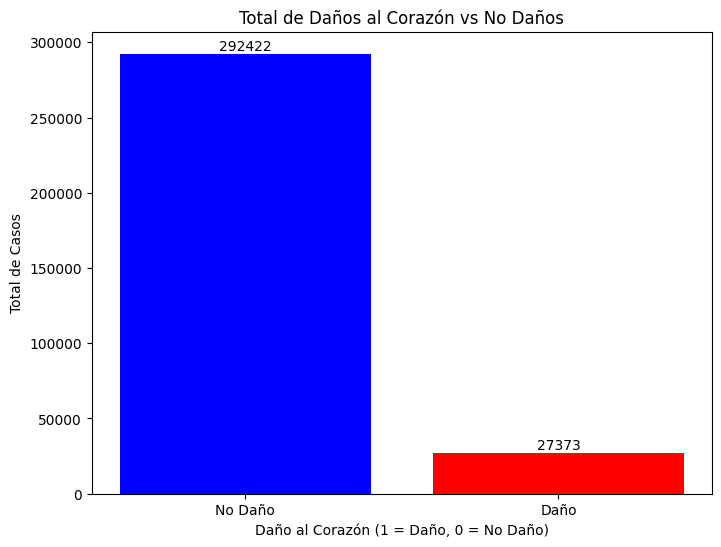

In [42]:
f_diagrama_barra(datos)

## Variables independiente y dependiente

Se designa a la variable HeartDisease01 como la variable etiqueta y dependiente.

Las variables BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer son independientes.

In [43]:
# 'HeartDisease01' es la variable objetivo

# Divide los datos en características y variable objetivo
independientes = datos.drop('HeartDisease01', axis=1)
dependiente = datos['HeartDisease01']

## Datos de entrenamiento y validación



In [44]:
# Dividir los datos en conjuntos de entrenamiento y prueba
entrenamiento, validacion, y_train, y_test = train_test_split(independientes, dependiente, test_size=0.3, random_state=2024)
X_train = entrenamiento.copy()
X_test = validacion.copy()
n_train = len(X_train)
n_test = len(X_test)

f_visualizar_datos(X_train.sort_index().head(20), X_test.sort_index().head(20),
                   "Primeros registros. Datos de entrenamiento de "+str(n_train) + " registros", "Primeros registros. Datos de validación de "+str(n_test) + " registros")

# Para mostrar el widget de salida
display(visualizar)

Output()

## Aplicar modelo perceptrón


In [45]:
# Marcar el tiempo de inicio
start_time = time.time()

# Crear y entrenar el modelo de perceptrón con datos de entrenamiento
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Marcar el tiempo de finalización
end_time = time.time()

# Calcular la duración restando el tiempo de inicio del tiempo de finalización
duration = end_time - start_time

print(f"El tiempo de ejecución fue de {duration} segundos.")

El tiempo de ejecución fue de 1.0819573402404785 segundos.


## Predicciones con datos de validación



In [46]:
# Hacer predicciones en los datos de entrenamiento
predicciones = perceptron.predict(X_test)

## Evaluar el modelo



In [47]:
# Calcular la precisión del modelo en los datos de entrenamiento
precision_train = accuracy_score(predicciones, y_test)
print("Precisión en datos de entrenamiento:", precision_train)

f_evaluar_modelo(predicciones, y_test)


Precisión en datos de entrenamiento: 0.9145394469402433
La exactitud del modelo es: 0.9145394469402433
Matriz de Confusión:
[[87727     3]
 [ 8196    13]]

VP: Verdaderos Positivos. El modelo la atina (V) a los que no ('No') tienen daño al corazón:  87727
FN: Falsos Negativos. El modelo falla (F) a los que no ('No') daño, prediciendo que si ('Yes') tienen daño al corazón:  3
FP: Falsos Positivos. El modelo falla (F) a los que si ('Yes') daño, prediciendo que no ('No) tienen daño al corazón:  8196
VN: Verdaderos Negativos. El modelo le atina (V) a los que si ('Yes') tienen daño al corazón:  13
Compronando
Accuracy = (VP + VN)/(VP + FN + FP + VN) ( 87727 + 13 ) / ( 87727 + 3 + 8196 + 13 ) =  0.9145394469402433


## Predicción con nuevo dato



In [51]:
import pandas as pd

# Definir los datos de la persona
datos_persona = {
    "BMI": [38],
    "Smoking": ["Yes"],
    "AlcoholDrinking": ["Yes"],
    "Stroke": ["Yes"],
    "PhysicalHealth": [2],
    "MentalHealth": [5],
    "DiffWalking": ["Yes"],
    "Sex": ["Male"],
    "AgeCategory": ["70-74"],
    "Race": ["Black"],
    "Diabetic": ["Yes"],
    "PhysicalActivity": ["No"],
    "GenHealth": ["Fair"],
    "SleepTime": [12],
    "Asthma": ["Yes"],
    "KidneyDisease": ["Yes"],
    "SkinCancer": ["No"]
}


# Transformado

datos_persona = {
    "BMI": [38],
    "Smoking": [1],
    "AlcoholDrinking": [1],
    "Stroke": [1],
    "PhysicalHealth": [2],
    "MentalHealth": [5],
    "DiffWalking": [1],
    "Sex": [2],
    "AgeCategory": [11], # 70-74
    "Race": [2], # Black
    "Diabetic": [1],
    "PhysicalActivity": [2],
    "GenHealth": [5], # Fair,
    "SleepTime": [12],
    "Asthma": [1],
    "KidneyDisease": [1],
    "SkinCancer": [2]
}

# Crear un DataFrame con los datos de la persona
persona = pd.DataFrame(datos_persona)

print(persona)


# Crear un DataFrame con los datos de la persona
persona = pd.DataFrame(datos_persona)

"""
# ...
# Falta comprobar matemátiamento con los coeficentes y la función log o logit o ln para
# encontrar la probabilidad
# ...
"""
print(persona)


prediccion = perceptron.predict(persona)
print ("La predicción es:", prediccion)
if prediccion == 1:
  print ("El paciente, NO está enfermO del corazón")
else:
  print ("El paciente, NO está enfermO del corazón")

   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0   38        1                1       1               2             5   

   DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
0            1    2           11     2         1                 2          5   

   SleepTime  Asthma  KidneyDisease  SkinCancer  
0         12       1              1           2  
   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0   38        1                1       1               2             5   

   DiffWalking  Sex  AgeCategory  Race  Diabetic  PhysicalActivity  GenHealth  \
0            1    2           11     2         1                 2          5   

   SleepTime  Asthma  KidneyDisease  SkinCancer  
0         12       1              1           2  
La predicción es: [0]
El paciente, NO está enfermO del corazón


# Interpretación

Accuracy = (VP + VN)/(VP + FN + FP + VN) ( 87727 + 13 ) / ( 87727 + 3 + 8196 + 13 ) =  0.9145394469402433

Significa que el modelo le atina al 91.45% de los casos.

